## Lineare Regression durch Überwachtes Lernen von Grund auf erklärt
Meistens werden, um maschinelles Lernen zu erklären, Module aus Libraries wie NumPy, Matplotlib, pandas oder sklearn benutzt, die einerseits den Umgang mit den Daten selbst erleichtern und andererseits vorgefertigte Methoden enthalten, die wir dann nur noch anwenden müssen. Hier wollen wir zunächst einen anderen Weg gehen und ein Problem (zugegebenermassen ein einfaches Problem) mit maschinellem Lernen lösen und hierzu nur Python-Grundlagen verwenden. Dies wird unser Verständnis vertiefen und außerdem genau aufzeigen, was hinter den Kulissen des maschinellen Lernens vorgeht. Lediglich das Modul ```matplotlib``` werden wir in sehr einfacher Form verwenden, um uns die Daten graphisch darstellen zu lassen. Wir werden danach unser Vorgehen zunehmend professionell gestalten.


Stellen wir uns vor, ein Bekannter von uns betreibt ein Restaurant, dass jeden Abend geöffnet hat. Er hat das Problem, daß er wissen möchte, wieviele  Gerichte er durchschnittlich an einem Abend verkaufen kann, damit er das Personal und die Rohstoffe entsprechend im Voraus einplanen kann. Er hat bemerkt, daß diese Zahlen sehr von der Anzahl der Reservierungen an diesem Tag abhängen. Diese Reservierungen sind ihm jeweils bis einige Stunden vor der Öffnung bekannt und er hat beobachtet, daß er natürlich mehr Gerichte anbieten kann, wenn mehr Reservierungen vorliegen. Aber neben den Reservierungen kommt auch eine variable Anzahl von Gästen, die nicht reserviert haben. Er fragt uns, ob wir ihm vielleicht helfen können, aus den Reservierungszahlen der letzten Monate und der dann erfolgten Abgabe von Gerichten auf zukünftige Zahlen schließen zu können. 

<img width=300 height=300 class="imgright" src="Images/restaurant.png" alt="restaurant" />

Dies ist ein Problem, welches wir hier versuchen wollen durch überwachtes Lernen zu lösen. Wir haben Reservierungszahlen und die jeweils zugehörige Anzahl von abgegebenen Gerichten vorliegen, haben also einige Datensätze mit den zugehörigen Labeln und könnten einen Algorithmus mit diesen Daten trainieren, um dann Voraussagen zu treffen. 

Wir bitten unseren Bekannten, uns seine Daten zukommen zu lassen und erhalten von ihm das Textfile "Reservierung.txt". 

In [7]:
with open("Data/Reservierungen.txt","r") as fh:
    for line in fh:
        x,y=line.rstrip().split(",") #um doppelten Zeilenumbruch zu vermeiden
        print(f"Reservierungen: {x} Mahlzeiten {y}")
    

Reservierungen: 10 Mahlzeiten 32
Reservierungen: 2 Mahlzeiten 30
Reservierungen: 49 Mahlzeiten 66
Reservierungen: 5 Mahlzeiten 32
Reservierungen: 97 Mahlzeiten 98
Reservierungen: 90 Mahlzeiten 90
Reservierungen: 100 Mahlzeiten 88
Reservierungen: 14 Mahlzeiten 45
Reservierungen: 36 Mahlzeiten 48
Reservierungen: 13 Mahlzeiten 26
Reservierungen: 50 Mahlzeiten 69
Reservierungen: 88 Mahlzeiten 73
Reservierungen: 39 Mahlzeiten 48
Reservierungen: 4 Mahlzeiten 35
Reservierungen: 16 Mahlzeiten 35
Reservierungen: 52 Mahlzeiten 62
Reservierungen: 61 Mahlzeiten 69
Reservierungen: 62 Mahlzeiten 67
Reservierungen: 23 Mahlzeiten 52
Reservierungen: 56 Mahlzeiten 56
Reservierungen: 3 Mahlzeiten 34
Reservierungen: 37 Mahlzeiten 60
Reservierungen: 96 Mahlzeiten 88
Reservierungen: 83 Mahlzeiten 78
Reservierungen: 70 Mahlzeiten 76
Reservierungen: 95 Mahlzeiten 85
Reservierungen: 40 Mahlzeiten 60
Reservierungen: 98 Mahlzeiten 91
Reservierungen: 19 Mahlzeiten 44
Reservierungen: 68 Mahlzeiten 77
Reservierunge

Diesen Zusammenhang lassen wir uns mit dem Modul Matplotlib graphisch ausgeben. Dies muss jetzt nicht gelernt oder verstanden werden, dazu folgt ein ganzes Kapitel, es dient nur der Veranschaulichung, denn als erstes wollen wir uns einen Überblick über die Daten verschaffen.

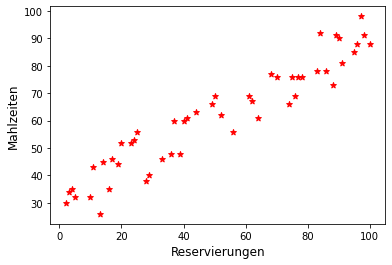

In [8]:
 
import matplotlib.pyplot as plt 
xliste,yliste=[],[]
with open("Data/Reservierungen.txt", "r") as fh:
    for line in fh:
        x,y=line.rstrip().split(",")
        xliste.append(int(x))
        yliste.append(int(y))  #wir schreiben unsere Reservierungen und die Anzahl der Mahlzeiten in
                                   #eine 2-dimensionale Liste

plt.xlabel("Reservierungen", fontsize=12)#wir legen die Label für X-Achse und Y-Achse fest.                 
plt.ylabel("Mahlzeiten", fontsize=12)
plt.scatter(xliste,yliste,color="red",marker="*")#wir machen mit matplotlib ein Streudiagramm


Wir sehen, daß die Daten grob gesehen einen linearen Zusammenhang aufweisen. Deshalb legen wir durch die Punkte eine Gerade, die sich den Punkten bestmöglich annähert. Dieses wäre das klassische Vorgehen der linearen Regression und natürlich gibt es hierzu einfache Methoden, die man benutzen könnte. Für die Steigung m und den Schnittpunkt b mit der y-Achse bekommen wir mit S für Summe, n Anzahl der Punkte :<br><br>
\begin{aligned}{ {m }}&={\frac {nS_{xy}-S_{x}S_{y}}{nS_{xx}-S_{x}^{2}}}\\[8pt]{ {b }}&={\frac {1}{n}}S_{y}-{ {m }}{\frac {1}{n}}S_{x}\end{aligned}<br>
Wir wollen das Problem jedoch mit maschinellem Lernen lösen. Die hier dargestellte berechnete optimale Linie dient sozusagen als "Referenz" unseres mit ML anzustrebenden Zieles. Die Steigung m dieser Optimalgeraden beträgt .587, der Schnittpunkt b mit der y-Achse 31.72 .

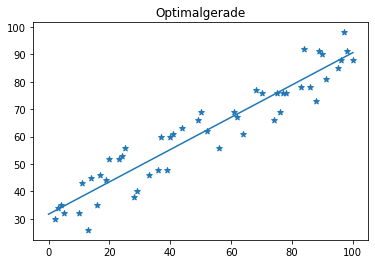

In [9]:
plt.title("Optimalgerade")
plt.xlabel("Reservierungen", fontsize=12)#wir legen die Label für X-Achse und Y-Achse fest.                 
plt.ylabel("Mahlzeiten", fontsize=12)
plt.scatter(xliste,yliste,marker="*")#wir machen mit matplotlib ein Streudiagramm
plt.plot((0,100),(31.72,90.59))#wir zeichnen die Gerade

Wir wollen unsere Reservierungsdaten jetzt nutzen, um in der Trainingsphase unseres Programmes dieses selbstständig einen Zusammenhang zwischen den Eingangsdaten (Reservierungen) und den Labeln (Mahlzeiten) finden zu lassen, wobei wir von einem linearen Zusammenhang ausgehen. Dies ist natürlich nicht immer gegeben, aber hier geht es ja um die grundsätzliche Erklärung des Verfahrens. Dann wollen wir vom Programm Voraussagen erstellen lassen und sehen, wie gut sie in unser Beispiel passen. 

<b>Um es klarer zu formulieren: das Modell soll aus allen denkbaren Geraden, die die Punkteverteilung unseres Modells approximieren, diejenige herausfinden, welche dies am besten kann.

Dazu müssen wir uns überlegen, wie wir eine solche Gerade mathematisch repräsentieren können und werden hierzu die übliche Geradengleichung verwenden:<br><br> <b>$$ y(Mahlzeiten) = m * x(Reservierungen) + b$$ </b><br> Hier vereinfachen wir zunächst weiter und lassen unsere Geraden durch den Nullpunkt gehen (b=0), um nur einen Parameter optimieren zu müssen. Hier ein Bündel mit solchen Geraden mit unterschiedlichen Werten für m und unsere Referenzgerade.

									Mögliche Gerade durch den Nullpunkt und optimale Gerade 
<img width=500 src="Images/plotwithmultiplelines.png"  />

Unsere Steigung m ist im Moment alles, was die jeweilige Gerade definiert. Wenn wir nun für eine solche Gerade eine Voraussage treffen wollen, ist das sehr einfach und folgt der Formel: <b>$$y_{vor}=m*x $$</b><br> dabei soll <b>$y_{vor}$</b> für den jeweiligen vorausgesagten Wert stehen (<b>y</b> gibt dagegen den wahren y-Wert am Punkt <b>x</b> an.)


Wenn wir nun durch unsere Liste von Reservierungen gehen und jeweils mit unserer momentanen Steigung m einen y_vor- Wert für jeden x-Wert erzeugen, werden wir feststellen, daß sich diese Werte von den echten y-Werten, die für unseren x-Wert vorliegen, abweichen. Es ergibt sich also ein Fehler für jeden x-Wert. Diese Fehler können wir summieren. Es ergibt sich dabei aber das Problem, daß der Fehler positiv sein kann, wenn y_vor > y ist oder negativ im umgekehrten Fall. So könnten sich die Fehler in der Fehlersumme ausgleichen und nicht die wahre Abweichung abbilden. Will man den wirklichen Fehler berücksichtigen, müßte man die absolute Abweichung von <b>$|y - y_{vor}|$</b> summieren. Man kann sich stattdessen aber auch damit behelfen, daß man die Abweichung jeweils quadriert und erhält damit immer positive Werte, die man einfach summieren kann, wobei die Quadrierung grössere Abweichung noch betont. Man bildet also als Wert zur Beurteilung des Verfahrens die Fehlerquadratsumme:<br><br>$$Fehlerquadratsumme = \sum_{i=1}^{n} (y - y_{vor})^2$$<br> Nun zur Implementierung. Wir berechnen für eine Steigung m (am Anfang auf willkürlich 0 gesetzt) die Summe der Fehlerquadrate und ändern dann die Steigung plus und minus um einen kleinen Wert, die Lernrate. Ist die Fehlersumme bei einem der beiden veränderten Werte der Steigung kleiner als die Fehlersumme mit der Originalsteigung, dann übernehmen wir diesen Steigungswert als neue Steigung für den nächsten Schritt. Dies wiederholen wir, bis zur Maximalzahl von Versuchen erreicht ist oder bis die Fehlersumme durch kleine Veränderungen der Steigung nicht mehr verbessert werden kann.

In [ ]:
def trainieren(x_werte,y_werte,anzahl_durchgänge,lernrate):
    m=0 #Anfangssteigung beliebig    
    for lauf in range(anzahl_durchgänge):        
        sum_0,sum_plus_lr,sum_minus_lr=0,0,0
        fehler_werte=0
        for i in range(len(x_werte)): #für alle Wertepaare Fehlerquadratsumme berechnen
            sum_0+=(m*x_werte[i]- y_werte[i])**2 #m Differenz berechneter Wert mit m und echter Wert zum Quadrat
            sum_plus_lr+=((m+lernrate)*x_werte[i]- y_werte[i])**2 #m+lernrate
            sum_minus_lr+=((m-lernrate)*x_werte[i]- y_werte[i])**2 #m-lernrate
        fehler_werte=sum_0,sum_plus_lr,sum_minus_lr
        min_index=fehler_werte.index(min(fehler_werte))
        if min_index==0:
            print(f"\nEnde, keine Verbesserung mehr,  Fehlerquadratsumme {min(fehler_werte):6.2f}, m = {m:4.2f} in Lauf {lauf} \n")                        
            return m
        elif min_index==1:                    
            m+=lernrate
        else:
            m-=lernrate        
    return m #beste Steigung für m, m+lernrate, m-lernrate

def voraussagen(m,x,y):
    for x_item,y_item in sorted(zip(x,y)):
        print(f"X-Wert:{x_item:4.2f} wahrer Y-Wert:{y_item:4.2f} vorausgesagter Y-Wert: {x_item*m:4.2f}")
    
    return 
    
x,y=[],[]    
with open("Data/Reservierungen.txt", "r") as fh:
    for line in fh:
        x_roh,y_roh=line.rstrip().split(",")        
        x.append(int(x_roh))#x und y kommt als String
        y.append(int(y_roh))

voraussagen(trainieren(x,y,50000,1e-4),x,y)

Wir sehen nun unsere errechnete Gerade und erkennen, dass hier noch viel Raum zur Verbesserung ist. Wir haben noch eine große Fehlerquadratsumme. Der Wert der optimalen Steigung unseres Verfahrens mit 1.04 weicht vom Wert der Referenzgeraden mit 0.587 noch gewaltig ab.
<img class="imgright" src="Images/plotwithlearnerline.png" alt="mit Linie" />

Ein deutlicher Schritt zur Verbesserung des Systems wäre, die errechnete Gerade nicht durch den Nullpunkt gehen zu lassen, wie es auch unsere Referenzgerade nicht tut. Hier benötigen wir nun unsere komplette Geradengleichung mit <b> $y_{vor}=x*m + b $</b> wobei b den Schnittpunkt mit der y-Achse darstellt. Wir würden unseren Algorithmus dann so implementieren, daß wir auch den Wert für b in kleinen Schritten verändern und optimieren (wie für m).


In [ ]:
def trainieren(x_werte,y_werte,anzahl_durchgänge,lernrate_m,lernrate_b):
    m,b=0,0 #1,1 #Anfangssteigung,Anfangsschnittpunkt
    
    for lauf in range(anzahl_durchgänge):
        sum_0,sum_m_plus_lr,sum_m_minus_lr,sum_b_plus_lr,sum_b_minus_lr=0,0,0,0,0
        for i in range(len(x_werte)):
            sum_0+=((m*x_werte[i]+b)- y_werte[i])**2
            sum_m_plus_lr+=((m+lernrate_m)*x_werte[i]+b- y_werte[i])**2 #m+lr
            sum_m_minus_lr+=((m-lernrate_m)*x_werte[i]+b- y_werte[i])**2 #m-lr
            sum_b_plus_lr+=((m*x_werte[i]+b+lernrate_b)- y_werte[i])**2 #b+lr
            sum_b_minus_lr+=((m*x_werte[i]+b-lernrate_b)- y_werte[i])**2 #b-lr
            
        werte=[sum_0,sum_m_plus_lr,sum_m_minus_lr,sum_b_plus_lr,sum_b_minus_lr]
        
        if min(werte)==sum_0:
            print(f"\n keine Verbesserung mehr,Fehlerquadratsumme {sum_0:6.1f}, m = {m:6.4f}, b= {b:6.4f} in Lauf {lauf}\n") 
            return m,b
           
        if min(werte)==sum_m_plus_lr:
            m+=lernrate_m
        elif min(werte)==sum_m_minus_lr:
            m-=lernrate_m
        elif min(werte)==sum_b_plus_lr:
            b+=lernrate_b
        elif min(werte)==sum_b_minus_lr:
            b-=lernrate_b      
    print(f"\n Fehlerquadratsumme {sum_0:6.1f} , m = {m:6.4f}, b= {b:6.4f} in Lauf {anzahl_durchgänge}\n")
    return m,b

def voraussagen(m,b,x,y):    
    for x_item,y_item in sorted(zip(x,y)):
        print(f"X-Wert:{x_item:4.3f} wahrer Y-Wert:{y_item:4.3f} vorausgesagter Y-Wert: {x_item*m+b:4.2f}")
    
    return 
    
    
x,y=[],[]    
with open("Data/Reservierungen.txt", "r") as fh:
    for line in fh:
        x_roh,y_roh=line.rstrip().split(",")        
        x.append(int(x_roh))#x und y kommt als String
        y.append(int(y_roh))

voraussagen(*trainieren(x,y,10000,0.001,0.1),x,y)

In [ ]:
from matplotlib.pyplot import figure
plt.figure(figsize=(8,8))
plt.scatter(xliste,yliste,marker="*")#wir machen mit matplotlib ein Streudiagramm
plt.plot((0,100),(31.72,90.59),c="r",label="Referenz")#wir zeichnen die Refrenzgerade
plt.plot((0,100),(31.9,90.3),c="b",label="System")
plt.xlabel("x",fontsize=20)
plt.ylabel("y",fontsize=20)
plt.legend()

Wir sehen, dass wir unser Ziel erreicht haben. Die Gerade liegt fast genau auf unserer "Referenzgeraden". Die Werte für m und b sind sehr nahe an den Werten der Referenzgeraden mit <br>
<table style="text-align: left; width: 50%; background-color: rgb(255, 255, 102);font-size:14pt;" border="1" cellpadding="2" cellspacing="2">
<tr>
<td style="vertical-align: top;">Referenz
</td>
<td style="vertical-align: top;">Lernsystem
</td>
</tr>
<tr>
<td style="vertical-align: top;">m= .587
</td>
<td style="vertical-align: top;">m= .584
</td>
</tr>    
</tr>
<tr>
<td style="vertical-align: top;">b= 31.72
</td>
<td style="vertical-align: top;">b= 31.90
</td>
</tr>      
</table>    
<br><br>



Fassen wir zusammen, haben wir ein Programm geschrieben, welches Eingangsdaten auf Ausgangsdaten abbildet und hierfür in der Lage ist, den Zusammenhang selbstständig zu optimieren. Im obigen Programm findet man einige Parameter, die auf willkürliche Werte gesetzt zu sein scheinen. Es sind die Ausgangswerte m und b für den Optimierungsprozess.
Variieren wir diese, hat das Auswirkungen auf den Zeitbedarf der Optimierung, das Ergebnis bleibt jedoch gleich. So sinkt der Zeitbedarf, wenn wir diese Werte von 0 , 0 auf 1 , 1 setzen, von 453 Läufen in diesem Beispiel auf 341 Läufe. Wichtiger sind die Werte für die lernrate_m und die lernrate_b, die jeweils die Schrittgrösse der Änderung für die Steigung m und den Schnittpunkt mit der y-Achse darstellen. Diese Werte haben ebenfalls einen Einfluss auf die Geschwindigkeit der Optimierung aber auch auf deren Genauigkeit.

<table style="text-align: left; width: 100%; background-color: rgb(255, 255, 102);font-size:14pt;" border="1" cellpadding="2" cellspacing="2">
<tr>
<td style="vertical-align: top;">lernrate_m
</td>
<td style="vertical-align: top;">lernrate_b
</td>
<td style="vertical-align: top;">Gesamtfehlerquadratsumme
</td>
<td style="vertical-align: top;">Anzahl Läufe bis Ende<br>(max 10000)
</td>
</tr>

<tr>
<td style="vertical-align: top;">
10 ** -1
</td>
<td style="vertical-align: top;">
10 ** -1
</td>
<td style="vertical-align: top;">
2473
</td>
<td style="vertical-align: top;">
273
</td>    
</tr>
    
<tr>
<td style="vertical-align: top;">
10 ** -2
</td>
<td style="vertical-align: top;">
10 ** -1
</td>
<td style="vertical-align: top;">
1868
</td>
<td style="vertical-align: top;">
453
</td>    
</tr>
    
<tr>
<td style="vertical-align: top;">
10 ** -3
</td>
<td style="vertical-align: top;">
10 ** -1
</td>
<td style="vertical-align: top;">
1860
</td>
<td style="vertical-align: top;">
1267
</td>    
</tr>

<tr>
<td style="vertical-align: top;">
10 ** -4
</td>
<td style="vertical-align: top;">
10 ** -1
</td>
<td style="vertical-align: top;">
1860
</td>
<td style="vertical-align: top;">
6760
</td>    
</tr>
    
<tr>
<td style="vertical-align: top;">
10 ** -5
</td>
<td style="vertical-align: top;">
10 ** -1
</td>
<td style="vertical-align: top;">
13559
</td>
<td style="vertical-align: top;">
>10000
</td>    
</tr>    
    
    
<tr>
<td style="vertical-align: top;">
10 ** -3
</td>
<td style="vertical-align: top;">
10 ** -2
</td>
<td style="vertical-align: top;">
1860
</td>
<td style="vertical-align: top;">
4670
</td>    
</tr>    
 
<tr>
<td style="vertical-align: top;">
10 ** -3
</td>
<td style="vertical-align: top;">
10 ** -3
</td>
<td style="vertical-align: top;">
8950
</td>
<td style="vertical-align: top;">
>10000
</td>    
</tr>
    
<tr>
<td style="vertical-align: top;">
10 ** -3
</td>
<td style="vertical-align: top;">
10 ** -4
</td>
<td style="vertical-align: top;">
14727
</td>
<td style="vertical-align: top;">
>10000
</td>    
</tr> 

</table>


Wir erkennen in obiger Tabelle, welchen Einfluss diese Parameter, die beim maschinellen Lernen als Hyperparameter bezeichnet werden, auf das Laufzeitverhalten bis zum Optimalwert haben, wobei wir die Anzahl der Durchgänge auf maximal 10000 beschränkt haben. Um die beste Leistung aus dem Lernverfahren herauszuholen, ist es eine notwendige Aufgabe, diese Hyperparameter auszutesten und zu optimieren. Wir erkennen außerdem, dass trotz eigentlich anzunehmender höherer Genauigkeit des Verfahrens bei sehr kleinen Werten für die Lernraten irgendwann der Gesamtfehler sogar wieder zuzunehmen scheint.<br><br>Dies deshalb, weil der Algorithmus in 10000 Schritten sein Optimum noch gar nicht erreicht hat. Um vergleichbare Fehlerwerte für die letzte Zeile zu erreichen wie für die beste Zeile müsste man <b>318517 Läufe</b> zulassen!

Nun werden wir unser Programm mit NumPy professioneller gestalten. Wir erkennen nun auch, wie schrittweise die Gerade verbessert wird.

In [ ]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib.pyplot import figure
#daten einlesen und übergeben

def fehler(X,Y,w,b):
    return np.sum((vorausgesagt(X,w,b)-Y)**2)

def vorausgesagt(X,w,b):
    return X*w+b
    

def train(X,Y,lauf_anzahl,lern_rate_w,lern_rate_b,step):
    w,ws,b,bs=0,[],0,[]
    flagw,flagb=0,0
    for _ in range(lauf_anzahl):
        walt,balt=w,b
        fehler_jetzt=fehler(X,Y,w,b)
        ###############Auskommentieren für Diagramm allein
        print(f"Lauf: {_:3d} Gesamtfehlerquadrat: {fehler_jetzt:5.2f}")
        w_up,w_down,b_up,b_down=w+lern_rate_w,w-lern_rate_w,b+lern_rate_b,b-lern_rate_b
        fehler_w_up,fehler_w_down=fehler(X,Y,w_up,b),fehler(X,Y,w_down,b)
        if fehler_w_up<fehler_jetzt:
            w=w_up
            ws.append(w)
        elif fehler_w_down<fehler_jetzt:
            w=w_down
            ws.append(w)
        else:
            ws.append(w)
            flagw=1
        fehler_b_up,fehler_b_down=fehler(X,Y,walt,b_up),fehler(X,Y,walt,b_down)
        if fehler_b_up<fehler_jetzt:
            b=b_up
            bs.append(b)
        elif fehler_b_down<fehler_jetzt:
            b=b_down
            bs.append(b)
        
        else:
            bs.append(b)
            flagb=1
        
        if flagw==1 and flagb==1:
            diagramm(X,Y,ws,bs,step) #um Diagramm zu produzieren
            return w,b
    print(f"Noch keine Konvergenz erreicht bei w = {w:5.2f} b = {b:5.2f}")
    diagramm(X,Y,ws,bs,step) #um Diagramm zu produzieren
    return w,b
    sys.exit()
              

def diagramm(X,Y,ws,bs,step):
    
    plt.figure(figsize=(12,12))
    plt.axis([0,100,0,100])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel("Reservierungen")
    plt.ylabel("Pizzas")
    plt.plot(X,Y,"ro")
    wsmax=max(ws)
    wsmin=min(ws)
    
    for i in range(0,len(ws),step):
        green=(i/len(ws))
        
        plt.plot((0,100),(bs[i],100*ws[i]+bs[i]),color=(0,1-green,0),linewidth=1,label=str(round(ws[i],2))+"/"+str(round(bs[i],2)))
    plt.legend(loc="upper left")
    plt.show()
    
X,Y=np.loadtxt("Data/Reservierungen_np.txt",skiprows=1,unpack=True)
print(f"die ersten 5 X_Werte {X[:5]}") # Numpy ohne Kommata beim Ausdruck
print(f"die ersten 5 Y_Werte {Y[:5]}")

w_ende,b_ende=train (X,Y,lauf_anzahl=500,lern_rate_w=.01,lern_rate_b=.1,step=10)
print(f" Bestes w ist: {w_ende:5.2f} Bestes b ist: {b_ende:5.2f}")
#diagramm(X,Y,w_ende,b_ende,step)

Natürlich beschränkt sich unser Verfahren nicht nur auf die lineare Regression. Wir zeigen im Folgenden ein Beispiel mit einem Polynom 3. Grades, welches wir mit ML approximieren möchten.<br>
Das Polynom wäre $$y = x^3*w0 + x^2*w1+ x * w2 + w3$$<br> Dabei ist zu beachten, daß wir nicht mehr die Unterscheidung in die Gewichte w und einen Wert für b machen. Unsere Gewichte (w0,w1,w2,w3) werden jetzt gleichberechtigt verwendet, w3  ist dann äquivalent zu b.<br>
Unser Testpolynom wäre:<br>$$y = x^3 * -.2 + x^2 * 5 + x * -4 + 3$$<br>
Dabei haben wir die Werte ein wenig gestreut.

 Hier unsere Werte zum Annähern:

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
sns.set()
#make the values
rng = np.random.RandomState(9)
X = 30 * rng.rand(200)-10
Y = X**3*-.2+X**2*5+X*-4+3 + 30 * rng.randn(200)
#print(X[:5])
#print(Y[:5])
plt.figure(figsize=(12,12))
plt.title("Beispielpunktewolke zum Annähern",fontsize =16)
plt.scatter(X,Y,c="red",s=5)

Wir nähern jetzt unsere Punktewolke mit Polynomen an, den Grad des Polynoms können wir eingeben. Unser Polynom, was die Punktwolke erzeugt hat, war dritten Grades, wie oben beschrieben.

In [ ]:





def fehler(X,Y,w):    
    return np.average((vorausgesagt(X,w)-Y)**2)

def vorausgesagt(X,w):    
    predict_sum=0
    for i in range(len(w)): #0 bis grad inclusiv        
        predict_sum+=X**i*w[i] # hier wird das Polynom erzeugt
    return predict_sum

def train(X,Y,lernrate,lauf_anzahl,grad):
    w=rng.uniform(-.2,.2,grad+1) #setze auf kleine pos-neg Werte
    ws,fehler_list=[],[]
    for lauf in range(lauf_anzahl):        
        fehler_jetzt=fehler(X,Y,w)
        ###############Auskommentieren für Diagramm
        #print(f"Lauf: {lauf:3d} Gesamtfehlerquadrat: {fehler_jetzt:6.4f}")
        w_new=w.copy()
        for index,w_to_change in enumerate(w):
            w_new[index]=w_to_change+lernrate
            if fehler(X,Y,w_new)<fehler_jetzt:
                continue
            w_new[index]=w_to_change-lernrate
            if fehler(X,Y,w_new)<fehler_jetzt:
                continue
        w=w_new.copy()
        ws.append(w)
        fehler_list.append(fehler(X,Y,ws[-1]))
        #f lauf>2 and fehler_list[lauf-2]==fehler_list[lauf]:
            #eturn w,ws,lauf_anzahl
#        
    return w,ws,lauf_anzahl

pol_grad=int(input("Welcher Polynomgrad?: "))
w_ende,ws,lauf_anzahl=train(X,Y,lauf_anzahl=1000,lernrate=.004,grad=pol_grad)#grad 5


fig, ax = plt.subplots( figsize=(10,6))
 
for lauf,lauf_ws in enumerate(ws):
    X0=np.linspace(-10,20,200)
    Y0=vorausgesagt(X0,lauf_ws)
    green=(lauf/lauf_anzahl)
    plt.title(f"Polynom Grad {pol_grad}")
    plt.plot(X0,Y0,color=(0,1-green,0),linewidth=1,alpha=.02) #alpha hochsetzen für Darstellung?
    plt.ylim((-100,800))
    plt.xlabel("X")
    plt.ylabel("Fehlerquadratsumme")
    
plt.scatter(X,Y,c="red",s=5)

Wir können nun die Qualität der Annäherung beurteilen in Abhängigkeit vom Polynomgrad, den wir verwenden. Dabei zeigt sich, dass bei Erhöhung des Grades des Polynoms über eine gewisse Grenze hinaus die Annäherung nicht verbessert wird, im Gegenteil streben die Werte an der Grenze des Bereichs schnell gegen Unendlich.

Hier zuletzt ein Beispiel unter Einsatz von sklearn als ML-Bibliothek. Zuerst die lineare Regression.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True) #die Linie muss nicht durch den 0 Punkt gehen
x,y=np.loadtxt("Data/Reservierungen_np.txt",skiprows=1,unpack=True)
newx=x[:,np.newaxis]
#print(x,np.shape(x)) #lineares Array
#print(newx[:10],np.shape(newx)) # Methode möchte x im shape (50,1) bei weiteren Features (n) wäre es (50,n)
#print(y) #y darf lineares Array bleiben
model.fit(newx, y)

xfit = np.linspace(0, 100, 1000) # 1000 Werte mit gleichem Absatnd zwischen 0 und 100
yfit = model.predict(xfit[:, np.newaxis]) #die entsprechenden y Werte des Modells

plt.scatter(x, y)
plt.plot(xfit, yfit); # die Gerade

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Hier nochmal ein nichtlineares Beispiel mit sklearn, auch wieder interessant die Auswirkung des Polynomgrades. Wir sehen zunächst die anzunähernde Punktwolke, die mit einem Sinus und dann einer Zufallsstreuung produziert wurde.<br>
Bei einem Polynom 19. Grades z.B. sehen wir wieder das "Verschwinden" der Annäherungskurve im Unendlichen und ein klares "Overfitting" vor allem im hohen Bereich. Hier versucht die Kurve einzelne Punkte abzubilden. Bei Polynomen geringen Grades sieht man eher "Underfitting" mit unzureichender Annäherung der Kurve.<br>Wir haben das Bestimmtheitsmass $R^2$ als Hinweis auf die Qualität der Annäherung ausgedruckt.<br>Diese Abwägung wie genau die Anpassung sein soll, um ein höchstmögliches Mass an Übereinstimmung mit den wahren Werten zu erreichen, wird uns im ML immer begleiten. <br>
<b>Overfitting: übergenaue Optimierung mit Überbetonung von einzelnen Samples und schlechter genereller Anpassung<br>
Underfitting: unzureichende Optimierung, Fehlersumme noch zu groß 

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#mache Punktwolke
rng = np.random.RandomState(10)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

#zeichne Punktwolke
plt.figure(figsize=(10,6))
plt.scatter(x, y,color="red")
plt.show()

#mache Regression mit den Graden bei color_nums und den Farben bei colors
plt.figure(figsize=(10,6))
plt.ylim((-3,1.5))
colormap=np.empty(22,dtype=object)    
color_nums=[2,3,6,10,15,19,21]
colors=["orange","blue","green","red","turquoise","black","violet"]
count=0
for i in color_nums:
    colormap[i]=colors[count]
    count+=1
    
#hier die eigentliche Regression    
for i in [2,3,6,10,15,19,21]:
    poly_model = make_pipeline(PolynomialFeatures(i), 
                           LinearRegression()) #benutze die Pipeline um die Polynome zu machen und dann die Regression


    poly_model.fit(x[:, np.newaxis], y) #berechne die beste Annäherung des Polynoms mit Grad i
    
    #drucke Werte für Coeffizienten aus
    print(f" R²:{poly_model.score(x[:, np.newaxis], y):4.3f} Grad {i}")
    
    #predicte für jweils 1000 Werte zwischen 0 und 10 die Werte des Polynoms 
    xfit = np.linspace(0, 10, 1000)
    yfit = poly_model.predict(xfit[:, np.newaxis])
    plt.plot(xfit, yfit, color=colormap[i],alpha=.7,label=str(i));
    
plt.scatter(x, y,color="red")
plt.legend(loc='lower left')

plt.show()

Wir haben bisher nur gezeigt, dass wir mit ML in der Lage sind, Annäherungen an Punktewolken durchzuführen. Erinnern wir uns an die Definitionen im Einführungskapitel geht es aber darum, nun neue Punkte (neue X-Werte) mit der optimalen Annäherung, die wir bei den hier gezeigten Lernvorgängen erreicht haben, vorauszusagen (bezüglich des zugehörigen Y-Wertes, den wir nicht haben!). Dazu später mehr.